# DSE 511 - Background Script
**Author:** Eva Kaushik  
**Fun Fact:** I enjoy finding patterns be it enormous datasets or especially my Spotify playlists.

In [20]:
#Agenda: Showcase my academic background, research interests, and technical skills in data analytics.

background = {
    "Current Role": "PhD Student, Data Science & Engineering, UTK",
    "Previous Role": "Data Scientist on Nestlé’s NesGPT use case",
    "Research Interests": ["Predictive Modeling", "Machine Learning", "Healthcare Analytics", "Data-Driven Decision Making"],
    "Programming Skills": ["Python (NumPy, Pandas, Scikit-learn, TensorFlow, PyTorch)", 
                           "R (ggplot2, survival)", 
                           "MATLAB (Signal processing, Optimization)", 
                           "SQL", "Java", "Shell Scripting"]
}

print("Hello! Quick glimpse of my background:")
for key, value in background.items():
    if isinstance(value, list):
        print(f"{key}: {', '.join(value)}")
    else:
        print(f"{key}: {value}")

Hello! Quick glimpse of my background:
Current Role: PhD Student, Data Science & Engineering, UTK
Previous Role: Data Scientist on Nestlé’s NesGPT use case
Research Interests: Predictive Modeling, Machine Learning, Healthcare Analytics, Data-Driven Decision Making
Programming Skills: Python (NumPy, Pandas, Scikit-learn, TensorFlow, PyTorch), R (ggplot2, survival), MATLAB (Signal processing, Optimization), SQL, Java, Shell Scripting


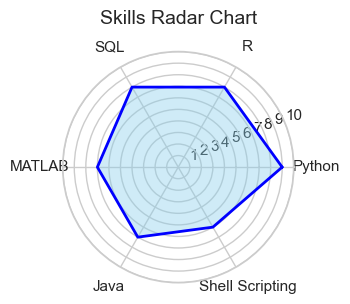

In [21]:
# Agenda: Visualize my proficiency levels across key programming and data skills

import matplotlib.pyplot as plt
import numpy as np

skills = ["Python", "R", "SQL", "MATLAB", "Java", "Shell Scripting"]
levels = [9, 8, 8, 7, 7, 6]

num_vars = len(skills)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

levels += levels[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(3,3), subplot_kw=dict(polar=True))
ax.plot(angles, levels, color="blue", linewidth=2)
ax.fill(angles, levels, color="skyblue", alpha=0.4)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)
ax.set_yticks(range(1, 11))
ax.set_title("Skills Radar Chart", fontsize=14, pad=20)
ax.grid(True)

plt.show()

In [22]:
# Agenda: Transform the nested `background` dictionary into a structured DataFrame
import pandas as pd

records = []

for key, value in background.items():
    if isinstance(value, dict):
        for subkey, subval in value.items():
            for item in subval:
                records.append([key, subkey, item])
    elif isinstance(value, list):
        for item in value:
            records.append([key, "", item])
    else:
        records.append([key, "", value])

df = pd.DataFrame(records, columns=["Category", "Subcategory", "Detail"])
df

,Category,Subcategory,Detail
0,Current Role,,"PhD Student, Data Science & Engineering, UTK"
1,Previous Role,,Data Scientist on Nestlé’s NesGPT use case
2,Research Interests,,Predictive Modeling
3,Research Interests,,Machine Learning
4,Research Interests,,Healthcare Analytics
5,Research Interests,,Data-Driven Decision Making
6,Programming Skills,,"Python (NumPy, Pandas, Scikit-learn, TensorFlo..."
7,Programming Skills,,"R (ggplot2, survival)"
8,Programming Skills,,"MATLAB (Signal processing, Optimization)"
9,Programming Skills,,SQL


In [23]:
df["Word_Count"] = df["Detail"].apply(lambda x: len(str(x).split()))
df["Char_Count"] = df["Detail"].apply(lambda x: len(str(x)))

stats_summary = (
    df.groupby("Category")
      .agg(
          Entries=("Detail", "count"),
          Avg_Words=("Word_Count", "mean"),
          Avg_Chars=("Char_Count", "mean"),
          Max_Words=("Word_Count", "max"),
          Min_Words=("Word_Count", "min")
      )
      .reset_index()
)
stats_summary

,Category,Entries,Avg_Words,Avg_Chars,Max_Words,Min_Words
0,Current Role,1,7.000000,44.000000,7,7
1,Previous Role,1,7.000000,42.000000,7,7
2,Programming Skills,6,2.833333,23.333333,6,1
3,Research Interests,4,2.250000,20.500000,3,2


C:\Users\ekaushik\AppData\Local\Temp\ipykernel_6168\3268002486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


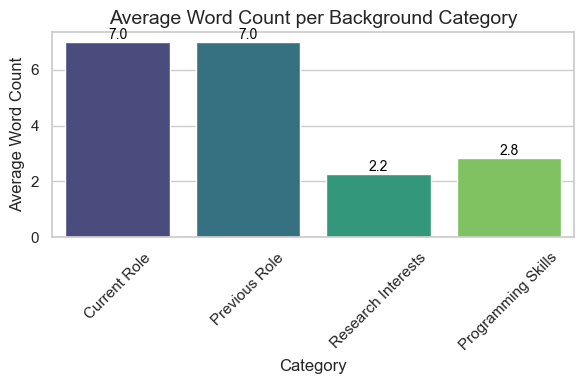

In [24]:
# Agenda: Visualize the average word count per background category using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=df, 
    x="Category", 
    y="Word_Count", 
    estimator="mean", 
    errorbar=None, 
    palette="viridis"
)

plt.title("Average Word Count per Background Category", fontsize=14)
plt.ylabel("Average Word Count", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [25]:
# Agenda: Cluster background details into groups using hierarchical clustering on text features

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Detail"])
Z = linkage(X.toarray(), method='ward')
df["Cluster"] = fcluster(Z, t=3, criterion='maxclust')  # 3 clusters

df_clusters = df[["Category", "Detail", "Cluster"]]
cluster_summary = df_clusters.groupby("Cluster").size().reset_index(name="Count")
sample_per_cluster = df_clusters.groupby("Cluster").head(1).reset_index(drop=True)

print("=== Cluster Summary ===")
print(cluster_summary, "\n")

print("=== Example from each Cluster ===")
print(sample_per_cluster)

=== Cluster Summary ===
   Cluster  Count
0        1     10
1        2      1
2        3      1 

=== Example from each Cluster ===
             Category                                             Detail  \
0        Current Role       PhD Student, Data Science & Engineering, UTK   
1       Previous Role         Data Scientist on Nestlé’s NesGPT use case   
2  Programming Skills  Python (NumPy, Pandas, Scikit-learn, TensorFlo...   

   Cluster  
0        1  
1        2  
2        3  


In [26]:
# Agenda: Compute and display pairwise cosine similarity between background details

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix, index=df["Detail"], columns=df["Detail"])
similarity_df.round(2).head(5)

Detail,"PhD Student, Data Science & Engineering, UTK",Data Scientist on Nestlé’s NesGPT use case,Predictive Modeling,Machine Learning,Healthcare Analytics,Data-Driven Decision Making,"Python (NumPy, Pandas, Scikit-learn, TensorFlow, PyTorch)","R (ggplot2, survival)","MATLAB (Signal processing, Optimization)",SQL,Java,Shell Scripting
Detail,,,,,,,,,,,,
"PhD Student, Data Science & Engineering, UTK",1.00,0.15,0.0,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0
Data Scientist on Nestlé’s NesGPT use case,0.15,1.00,0.0,0.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0
Predictive Modeling,0.00,0.00,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Machine Learning,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Healthcare Analytics,0.00,0.00,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


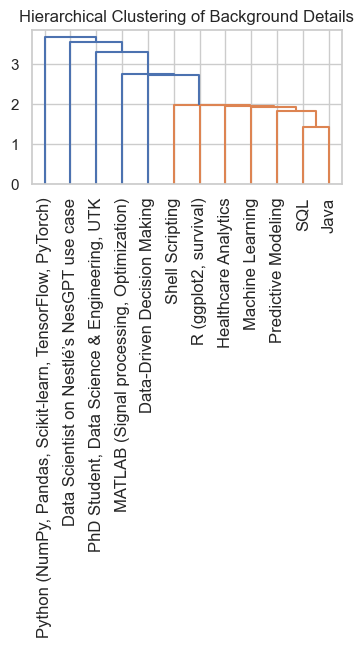

In [46]:
#Agenda: Visualize hierarchical clustering of background details using a dendrogram.

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X.toarray(), method='ward')
plt.figure(figsize=(4, 2))
dendrogram(Z, labels=df["Detail"].values, leaf_rotation=90)
plt.title("Hierarchical Clustering of Background Details")
plt.show()
